# 1.0 Basic Variable Extraction

In [1]:
from __future__ import (absolute_import, division, print_function, unicode_literals)

from wrf import getvar
from netCDF4 import Dataset as nc
#ncfile = nc("/Users/ladwig/Documents/wrf_files/wrfout_d01_2016-02-25_18_00_00")
ncfile = nc("/Users/ladwig/Documents/wrf_files/wrfout_d01_2016-10-07_00_00_00")


In [2]:
p = getvar(ncfile, "P")
print(p)


<xarray.DataArray u'P' (bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
           1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
        [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
           1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
        [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
           1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
        ..., 
        [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
           1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
        [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
           1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
        [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
           1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

       [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
           9.94968750e+02,   9.97398438e+02,   

### 1.0.1 DataArray attributes:  'dims', 'coords', 'attrs'

In [3]:
print("dims: ", p.dims)
print("coords: ", p.coords) 
print("attrs: ", p.attrs)
del p

dims:  (u'bottom_top', u'south_north', u'west_east')
coords:  Coordinates:
    XLONG        (south_north, west_east) float32 -122.72 -122.693 -122.666 ...
    XLAT         (south_north, west_east) float32 21.1381 21.1451 21.1521 ...
    Time         datetime64[ns] 2016-10-07
  * bottom_top   (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * south_north  (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * west_east    (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
attrs:  OrderedDict([(u'FieldType', 104), (u'MemoryOrder', u'XYZ'), (u'description', u'perturbation pressure'), (u'units', u'Pa'), (u'stagger', u''), (u'coordinates', u'XLONG XLAT'), (u'projection', LambertConformal(stand_lon=-97.5, moad_cen_lat=38.5000038147, truelat1=38.5, truelat2=38.5, pole_lat=90.0, pole_lon=0.0))])


### 1.0.2 Removing implicit 'squeeze' behavior to preserve single sized dimensions

In [4]:
p_nosqueeze = getvar(ncfile, "P", timeidx=0, squeeze=False)
print (p_nosqueeze)


<xarray.DataArray u'P' (Time: 1, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
            1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
         [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
            1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
         [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
            1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
         ..., 
         [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
            1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
         [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
            1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
         [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
            1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

        [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
            9.94968750e+

### 1.0.3 Single element metadata

In [5]:
print (p_nosqueeze[0,0,100,200])
del p_nosqueeze

<xarray.DataArray u'P' ()>
array(1227.2734375, dtype=float32)
Coordinates:
    XLONG        float32 -117.922
    XLAT         float32 24.9454
    Time         datetime64[ns] 2016-10-07
    bottom_top   int64 0
    south_north  int64 100
    west_east    int64 200
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: perturbation pressure
    units: Pa
    stagger: 
    coordinates: XLONG XLAT
    projection: LambertConformal(stand_lon=-97.5, moad_cen_lat=38.5000038147, truelat1=38.5, truelat2=38.5, pole_lat=90.0, pole_lon=0.0)


### 1.0.4 Disabling/Enabling xarray

In [6]:
from wrf import disable_xarray, enable_xarray

# Disable xarray completely
disable_xarray()
p_no_meta = getvar(ncfile, "P")
print(type(p_no_meta))
print (p_no_meta)
del p_no_meta
enable_xarray()

# Disable on extraction
p_no_meta = getvar(ncfile, "P", meta=False)
print("\n")
print(type(p_no_meta))
print(p_no_meta)
del p_no_meta


<type 'numpy.ndarray'>
[[[  1.21753906e+03   1.22532031e+03   1.22030469e+03 ...,   1.00760156e+03
     9.87640625e+02   1.00111719e+03]
  [  1.23877344e+03   1.24004688e+03   1.22926562e+03 ...,   1.00519531e+03
     1.00529688e+03   9.99171875e+02]
  [  1.23503906e+03   1.23367188e+03   1.23731250e+03 ...,   1.01739844e+03
     1.00005469e+03   9.97093750e+02]
  ..., 
  [  9.02625000e+02   9.05328125e+02   8.97203125e+02 ...,   1.91794531e+03
     1.91308594e+03   1.90972656e+03]
  [  9.20859375e+02   9.05914062e+02   8.97054688e+02 ...,   1.90585156e+03
     1.90292188e+03   1.90480469e+03]
  [  9.17273438e+02   9.09109375e+02   8.96390625e+02 ...,   1.89047656e+03
     1.89437500e+03   1.90342188e+03]]

 [[  1.21956250e+03   1.21027344e+03   1.21426562e+03 ...,   9.94968750e+02
     9.97398438e+02   9.90789062e+02]
  [  1.22457812e+03   1.22350781e+03   1.22536719e+03 ...,   9.95195312e+02
     9.98554688e+02   9.92117188e+02]
  [  1.23416406e+03   1.23213281e+03   1.23096875e+03 .

# 2.0 Sequences of Input Files 

## 2.0.1 Combining via the 'cat' method

In [7]:
from wrf import ALL_TIMES
import numpy as np
wrflist = [ncfile, ncfile, ncfile]
p_cat = getvar(wrflist, "P", timeidx=ALL_TIMES, method="cat")

print(p_cat)
del p_cat

<xarray.DataArray u'P' (Time: 3, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
            1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
         [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
            1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
         [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
            1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
         ..., 
         [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
            1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
         [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
            1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
         [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
            1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

        [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
            9.94968750e+

## 2.0.2 Combining via the 'join' method

In [8]:
p_join = getvar(wrflist, "P", timeidx=ALL_TIMES, method="join")
print(p_join)

<xarray.DataArray u'P' (file: 3, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
            1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
         [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
            1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
         [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
            1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
         ..., 
         [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
            1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
         [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
            1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
         [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
            1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

        [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
            9.94968750e+

Note how the Time dimension was replaced with the file dimension, due to the 'squeezing' of the Time dimension.


To maintain the Time dimension, set squeeze to False.

In [9]:
from wrf import ALL_TIMES
p_join = getvar(wrflist, "P", timeidx=ALL_TIMES, method="join", squeeze=False)
print(p_join)
del p_join

<xarray.DataArray u'P' (file: 3, Time: 1, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
             1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
          [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
             1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
          [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
             1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
          ..., 
          [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
             1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
          [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
             1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
          [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
             1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

         [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
 

## 2.0.3 Dictionary Sequences

In [10]:
wrf_dict = {"label1" : [ncfile, ncfile],
           "label2" : [ncfile, ncfile]}
p_dict = getvar(wrf_dict, "P", timeidx=ALL_TIMES)
print(p_dict)
del p_dict

<xarray.DataArray 'P' (key_0: 2, Time: 2, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
             1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
          [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
             1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
          [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
             1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
          ..., 
          [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
             1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
          [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
             1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
          [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
             1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

         [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
 

## 2.0.4 Generator Sequences

In [11]:
def gen_seq():
    wrfseq = [ncfile, ncfile, ncfile]
    for wrf in wrfseq:
        yield wrf
        
p_gen = getvar(gen_seq(), "P", method="join")
print(p_gen)
del p_gen

<xarray.DataArray u'P' (file: 3, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
            1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
         [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
            1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
         [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
            1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
         ..., 
         [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
            1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
         [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
            1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
         [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
            1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

        [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
            9.94968750e+

## 2.0.5 Custom Iterable Classes

In [12]:
class FileGen(object):
    def __init__(self, ncfile, count=3):
        self._total = count
        self._i = 0
        self.ncfile = [ncfile]*count
        
    def __iter__(self):
        return self
    
    def next(self):
        if self._i >= self._total:
            raise StopIteration
        else:
            val = self.ncfile[self._i]
            self._i += 1
            return val
    
    # Python 3
    def __next__(self):
        return self.next()

obj_gen = FileGen(ncfile, 3)

p_obj_gen = getvar(gen_seq(), "P", method="join", squeeze=False)
print(p_obj_gen)

del p_obj_gen
        

<xarray.DataArray u'P' (file: 3, Time: 1, bottom_top: 50, south_north: 1059, west_east: 1799)>
array([[[[[  1.21753906e+03,   1.22532031e+03,   1.22030469e+03, ...,
             1.00760156e+03,   9.87640625e+02,   1.00111719e+03],
          [  1.23877344e+03,   1.24004688e+03,   1.22926562e+03, ...,
             1.00519531e+03,   1.00529688e+03,   9.99171875e+02],
          [  1.23503906e+03,   1.23367188e+03,   1.23731250e+03, ...,
             1.01739844e+03,   1.00005469e+03,   9.97093750e+02],
          ..., 
          [  9.02625000e+02,   9.05328125e+02,   8.97203125e+02, ...,
             1.91794531e+03,   1.91308594e+03,   1.90972656e+03],
          [  9.20859375e+02,   9.05914062e+02,   8.97054688e+02, ...,
             1.90585156e+03,   1.90292188e+03,   1.90480469e+03],
          [  9.17273438e+02,   9.09109375e+02,   8.96390625e+02, ...,
             1.89047656e+03,   1.89437500e+03,   1.90342188e+03]],

         [[  1.21956250e+03,   1.21027344e+03,   1.21426562e+03, ...,
 

# 3.0 WRF Variable Computational Routines

In [13]:
wrf_vars = ["avo", "eth", "cape_2d", "cape_3d", "ctt", "dbz", "mdbz", 
            "geopt", "helicity", "lat", "lon", "omg", "p", "pressure", 
            "pvo", "pw", "rh2", "rh", "slp", "ter", "td2", "td", "tc",
            "theta", "tk", "tv", "twb", "updraft_helicity", "ua", "va", 
            "wa", "uvmet10", "uvmet", "z", "ctt"]
wrf_vars = ["slp"]

vard = {varname: getvar(ncfile, varname, method="cat", squeeze=True) for varname in wrf_vars}
for varname in wrf_vars:
    print(vard[varname])
    print ("\n")


<xarray.DataArray u'slp' (south_north: 1059, west_east: 1799)>
array([[ 1012.22033691,  1012.29815674,  1012.24786377, ...,
         1010.13201904,  1009.93231201,  1010.06707764],
       [ 1012.43286133,  1012.44476318,  1012.33666992, ...,
         1010.1072998 ,  1010.10845947,  1010.04760742],
       [ 1012.39544678,  1012.38085938,  1012.41705322, ...,
         1010.22937012,  1010.05596924,  1010.02679443],
       ..., 
       [ 1009.0423584 ,  1009.06921387,  1008.98779297, ...,
         1019.19281006,  1019.14434814,  1019.1105957 ],
       [ 1009.22485352,  1009.07513428,  1008.98638916, ...,
         1019.07189941,  1019.04266357,  1019.0612793 ],
       [ 1009.18896484,  1009.1071167 ,  1008.97979736, ...,
         1018.91778564,  1018.95684814,  1019.04748535]], dtype=float32)
Coordinates:
    XLONG        (south_north, west_east) float32 -122.72 -122.693 -122.666 ...
    XLAT         (south_north, west_east) float32 21.1381 21.1451 21.1521 ...
    Time         datetime64[n

(Note all of the NaNs in the above routines which produce missing values (e.g. cape_2d).  xarray always converts all masked_array missing values to NaN in order to work with pandas.  To get back the original missing values in a numpy masked_array, you need to use the 'to_np' method from wrf.)

In [14]:
from wrf import to_np
masked_ndarray = to_np(vard["slp"])
print(type(masked_ndarray))
del masked_ndarray

<type 'numpy.ndarray'>


In [15]:
keys = [x for x in vard.keys()]
for key in keys:
    del vard[key]

## 3.1 Interpolation Routines

### 3.1.1 Horizontal Level Interpolation

In [16]:
# 500 MB Heights
from wrf import getvar, interplevel

z = getvar(ncfile, "z")
p = getvar(ncfile, "pressure")
ht_500mb = interplevel(z, p, 500)

print(ht_500mb)
del ht_500mb, z, p

<xarray.DataArray u'height_500_hPa' (south_north: 1059, west_east: 1799)>
array([[ 5882.16992188,  5881.87939453,  5881.81005859, ...,
         5890.14501953,  5890.23583984,  5890.33349609],
       [ 5882.71777344,  5882.17529297,  5882.1171875 , ...,
         5890.37695312,  5890.38525391,  5890.27978516],
       [ 5883.32177734,  5882.47119141,  5882.34130859, ...,
         5890.48339844,  5890.42871094,  5890.17724609],
       ..., 
       [ 5581.45800781,  5580.46826172,  5579.32617188, ...,
         5788.93554688,  5788.70507812,  5788.64453125],
       [ 5580.32714844,  5579.51611328,  5578.34863281, ...,
         5788.15869141,  5787.87304688,  5787.65527344],
       [ 5579.64404297,  5578.30957031,  5576.98632812, ...,
         5787.19384766,  5787.10888672,  5787.06933594]], dtype=float32)
Coordinates:
    XLONG        (south_north, west_east) float32 -122.72 -122.693 -122.666 ...
    XLAT         (south_north, west_east) float32 21.1381 21.1451 21.1521 ...
    Time         d

### 3.1.2 Vertical Cross Section Interpolation

In [17]:
# Pressure using pivot and angle
from wrf import getvar, vertcross, CoordPair

z = getvar(ncfile, "z")
p = getvar(ncfile, "pressure")
pivot_point = CoordPair((z.shape[-1]-1) // 2, (z.shape[-2] - 1) // 2) 
angle = 90.0

p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, latlon=True)
print(p_vert)
print ("\n")
del p_vert

# Pressure using start_point and end_point
start_point = CoordPair(0, (z.shape[-2]-1) // 2)
end_point = CoordPair(-1, (z.shape[-2]-1) // 2)

p_vert = vertcross(p, z, start_point=start_point, end_point=end_point, latlon=True)
print(p_vert)
del p_vert, p, z

<xarray.DataArray u'pressure_cross' (vertical: 100, idx: 1798)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [ 989.66168213,  989.66802979,  989.66351318, ...,  988.05737305,
         987.99151611,  987.96917725],
       [ 959.49450684,  959.50109863,  959.50030518, ...,  958.96948242,
         958.92980957,  958.89294434],
       ..., 
       [  24.28092003,   24.27359581,   24.27034378, ...,   24.24800491,
          24.2486496 ,   24.24947357],
       [  23.2868309 ,   23.27933884,   23.27607918, ...,   23.25231361,
          23.2530098 ,   23.25384521],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
    Time      datetime64[ns] 2016-10-07
    xy_loc    (idx) object CoordPair(x=0.0, y=529.0, lat=34.5279502869, lon=-127.398925781) ...
  * vertical  (vertical) float32 0.0 261.828 523.656 785.484 1047.31 1309.14 ...
  * i

In [18]:
# Pressure using pivot and angle
from wrf import getvar, vertcross, CoordPair, xy_to_ll

z = getvar(ncfile, "z")
p = getvar(ncfile, "pressure")
lats = getvar(ncfile, "lat")
lons = getvar(ncfile, "lon")

#print ((lats.shape[-2]-1) / 2)
#print ((lats.shape[-1]-1) / 2)

#print (to_np(lats[529, 899]))
#print (to_np(lons[529, 899]))

#print (to_np(lats[529, 0]))
#print (to_np(lons[529, 0]))

#print (to_np(lats[529, -1]))
#print (to_np(lons[529, -1]))

pivot_point = CoordPair(lat=38.5, lon=-97.5) 
angle = 90.0

p_vert = vertcross(p, z, wrfin=ncfile, pivot_point=pivot_point, angle=angle, latlon=True)
print (p_vert)
print ("\n")

start_lat = lats[(lats.shape[-2]-1)//2, 0]
end_lat = lats[(lats.shape[-2]-1)//2, -1]
start_lon = lons[(lats.shape[-2]-1)//2, 0]
end_lon = lons[(lats.shape[-2]-1)//2, -1]

print (start_lat)
print (end_lat)
print (start_lon)
print (end_lon)

# Pressure using start_point and end_point
start_point = CoordPair(lat=start_lat, lon=start_lon)
end_point = CoordPair(lat=end_lat, lon=end_lon)

p_vert = vertcross(p, z, wrfin=ncfile, start_point=start_point, end_point=end_point, latlon=True)
print(p_vert)

<xarray.DataArray u'pressure_cross' (vertical: 100, idx: 1798)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [ 989.66168213,  989.66802979,  989.66351318, ...,  988.05737305,
         987.99151611,  987.96917725],
       [ 959.49450684,  959.50109863,  959.50030518, ...,  958.96948242,
         958.92980957,  958.89294434],
       ..., 
       [  24.28092003,   24.27359581,   24.27034378, ...,   24.24800491,
          24.2486496 ,   24.24947357],
       [  23.2868309 ,   23.27933884,   23.27607918, ...,   23.25231361,
          23.2530098 ,   23.25384521],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
    Time      datetime64[ns] 2016-10-07
    xy_loc    (idx) object CoordPair(x=0.0, y=529.0, lat=34.5279502869, lon=-127.398925781) ...
  * vertical  (vertical) float32 0.0 261.828 523.656 785.484 1047.31 1309.14 ...
  * i

In [19]:
# Pressure using pivot and angle
from wrf import getvar, vertcross, CoordPair, xy_to_ll

z = getvar(ncfile, "z")
p = getvar(ncfile, "pressure")
lats = getvar(ncfile, "lat")
lons = getvar(ncfile, "lon")

#print ((lats.shape[-2]-1) / 2)
#print ((lats.shape[-1]-1) / 2)

#print (to_np(lats[529, 899]))
#print (to_np(lons[529, 899]))

#print (to_np(lats[529, 0]))
#print (to_np(lons[529, 0]))

#print (to_np(lats[529, -1]))
#print (to_np(lons[529, -1]))

pivot_point = CoordPair(lat=38.5, lon=-97.5) 
angle = 90.0

p_vert = vertcross(p, z, wrfin=ncfile, pivot_point=pivot_point, angle=angle, latlon=True)
print (p_vert)
print ("\n")

start_lat = lats[(lats.shape[-2]-1)//2, 0]
end_lat = lats[(lats.shape[-2]-1)//2, -1]
start_lon = lons[(lats.shape[-2]-1)//2, 0]
end_lon = lons[(lats.shape[-2]-1)//2, -1]

print (start_lat)
print (end_lat)
print (start_lon)
print (end_lon)

# Pressure using start_point and end_point
start_point = CoordPair(lat=start_lat, lon=start_lon)
end_point = CoordPair(lat=end_lat, lon=end_lon)

levels = [1000., 2000., 3000.]

p_vert = vertcross(p, z, wrfin=ncfile, levels=levels, start_point=start_point, end_point=end_point, latlon=True)
print(p_vert)

<xarray.DataArray u'pressure_cross' (vertical: 100, idx: 1798)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [ 989.66168213,  989.66802979,  989.66351318, ...,  988.05737305,
         987.99151611,  987.96917725],
       [ 959.49450684,  959.50109863,  959.50030518, ...,  958.96948242,
         958.92980957,  958.89294434],
       ..., 
       [  24.28092003,   24.27359581,   24.27034378, ...,   24.24800491,
          24.2486496 ,   24.24947357],
       [  23.2868309 ,   23.27933884,   23.27607918, ...,   23.25231361,
          23.2530098 ,   23.25384521],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
    Time      datetime64[ns] 2016-10-07
    xy_loc    (idx) object CoordPair(x=0.0, y=529.0, lat=34.5279502869, lon=-127.398925781) ...
  * vertical  (vertical) float32 0.0 261.828 523.656 785.484 1047.31 1309.14 ...
  * i

### 3.1.3 Interpolate 2D Variable to a Line

In [20]:
# T2 using pivot and angle
from wrf import interpline, getvar, CoordPair

t2 = getvar(ncfile, "T2")
pivot_point = CoordPair((t2.shape[-1]-1)//2, (t2.shape[-2]-1)//2) 
angle = 0.0

t2_line = interpline(t2, pivot_point=pivot_point, angle=angle, latlon=True)
print(t2_line, "\n")

del t2_line

# T2 using start_point and end_point
start_point = CoordPair((t2.shape[-1]-1)//2, 0)
end_point = CoordPair((t2.shape[-1]-1)//2, -1)

t2_line = interpline(t2, start_point=start_point, end_point=end_point, latlon=True)
print(t2_line, "\n")

del t2_line

t2 = getvar(ncfile, "T2")
lats = getvar(ncfile, "lat")
lons = getvar(ncfile, "lon")

start_lat = lats[0, (lats.shape[-1]-1)//2]
end_lat = lats[-1, (lats.shape[-1]-1)//2]
start_lon = lons[0, (lons.shape[-1]-1)//2]
end_lon = lons[-1, (lons.shape[-1]-1)//2]

start_point = CoordPair(lat=start_lat, lon=start_lon)
end_point = CoordPair(lat=end_lat, lon=end_lon)

t2_line = interpline(t2, wrfin=ncfile, start_point=start_point, end_point=end_point, latlon=True)
print (t2_line)

del t2_line, t2


<xarray.DataArray u'T2_line' (line_idx: 1058)>
array([ 302.07214355,  302.08505249,  302.08688354, ...,  279.18557739,
        279.1998291 ,  279.23132324], dtype=float32)
Coordinates:
    Time      datetime64[ns] 2016-10-07
    xy_loc    (line_idx) object CoordPair(x=899.0, y=0.0, lat=24.3645858765, lon=-97.5) ...
  * line_idx  (line_idx) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    FieldType: 104
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT
    projection: LambertConformal(stand_lon=-97.5, moad_cen_lat=38.5000038147, truelat1=38.5, truelat2=38.5, pole_lat=90.0, pole_lon=0.0)
    orientation: (899.0, 0.0) to (899.0, 1057.0) ; center=CoordPair(x=899, y=529) ; angle=0.0 

<xarray.DataArray u'T2_line' (line_idx: 1058)>
array([ 302.07214355,  302.08505249,  302.08688354, ...,  279.18557739,
        279.1998291 ,  279.23132324], dtype=float32)
Coordinates:
    Time      datetime64[ns] 2016-10-07
    xy_loc    (line_idx) object

### 3.1.4 Vertical Coordinate Interpolation

In [21]:
from wrf import vinterp, getvar

# Interpolate tk to theta levels         
tk = getvar(ncfile, "tk")            
interp_levels = [200, 300, 500, 1000]

interp_field = vinterp(ncfile, 
                field=tk, 
                vert_coord="theta", 
                interp_levels=interp_levels, 
                extrapolate=True, 
                field_type="tk", 
                log_p=True)

print(interp_field)
del interp_field

# Interpolate tk to theta-e levels         
           
interp_levels = [200, 300, 500, 1000]

interp_field = vinterp(ncfile, 
                field=tk, 
                vert_coord="eth", 
                interp_levels=interp_levels, 
                extrapolate=True, 
                field_type="tk", 
                log_p=True)

print(interp_field)
del interp_field

# Interpolate tk to geopotential height (MSL) levels         
           
interp_levels = [30, 60, 90]

interp_field = vinterp(ncfile, 
                field=tk, 
                vert_coord="ght_msl", 
                interp_levels=interp_levels, 
                extrapolate=True, 
                field_type="tk", 
                log_p=True)

print(interp_field)
del interp_field

# Interpolate tk to geopotential height (MSL) levels         
           
interp_levels = [30, 60, 90]

interp_field = vinterp(ncfile, 
                field=tk, 
                vert_coord="ght_agl", 
                interp_levels=interp_levels, 
                extrapolate=True, 
                field_type="tk", 
                log_p=True)

print(interp_field)
del interp_field

# Interpolate tk to pressure levels
interp_levels = [850, 500]
            
interp_field = vinterp(ncfile, 
                field=tk, 
                vert_coord="pressure", 
                interp_levels=interp_levels, 
                extrapolate=True, 
                field_type="tk", 
                log_p=True)

print(interp_field)
del interp_field, tk


<xarray.DataArray u'temp' (interp_level: 4, south_north: 1059, west_east: 1799)>
array([[[ 296.12872314,  296.1166687 ,  296.08905029, ...,  301.71026611,
          301.67956543,  301.67791748],
        [ 296.11352539,  295.95581055,  295.91555786, ...,  301.63052368,
          301.62905884,  301.65887451],
        [ 296.07556152,  295.91577148,  295.88214111, ...,  301.61499023,
          301.60287476,  301.63961792],
        ..., 
        [ 286.52096558,  286.41018677,  286.36764526, ...,  286.04336548,
          286.06069946,  286.11782837],
        [ 286.53607178,  286.43389893,  286.39651489, ...,  286.04037476,
          286.05493164,  286.1048584 ],
        [ 286.52865601,  286.5005188 ,  286.465271  , ...,  286.06069946,
          286.07052612,  286.09399414]],

       [[ 288.80395508,  288.80670166,  288.80947876, ...,  301.71026611,
          301.67956543,  301.67791748],
        [ 288.79626465,  288.80310059,  288.81011963, ...,  301.63052368,
          301.62905884,  301.65

## 3.2 Lat/Lon to X/Y Routines

In [22]:
from wrf.latlon import xy_to_ll, ll_to_xy 

a = xy_to_ll(ncfile, 400, 200)
a1 = ll_to_xy(ncfile, a[0], a[1])

#print(a)
#print("\n")
#print(a1)
#print("\n")

a = xy_to_ll(ncfile, [400,105], [200,205])
a1 = ll_to_xy(ncfile, a[0,:], a[1,:])

b = ll_to_xy(ncfile, 45.5, -110.8, as_int=True)

# Note: Lists/Dictionaries of files will add a new dimension ('domain') only if the domain is moving
c = xy_to_ll([ncfile, ncfile, ncfile], [400,105], [200,205])
d = xy_to_ll({"label1" : [ncfile, ncfile],
              "label2" : [ncfile, ncfile]}, 
             [400,105], [200,205])

print(a)
print("\n")
print(a1)
print("\n")
print(b)
print("\n")
print(c)
print("\n")
print(d)

<xarray.DataArray u'latlon' (lat_lon: 2, idx: 2)>
array([[  28.55816408,   27.03835783],
       [-112.67827617, -121.36392174]])
Coordinates:
  * lat_lon   (lat_lon) <U3 u'lat' u'lon'
    xy_coord  (idx) object CoordPair(x=400, y=200) CoordPair(x=105, y=205)
  * idx       (idx) int64 0 1


<xarray.DataArray u'xy' (x_y: 2, idx: 2)>
array([[400, 105],
       [200, 205]])
Coordinates:
    latlon_coord  (idx) object CoordPair(lat=28.5581640822, lon=-112.678276173) ...
  * x_y           (x_y) <U1 u'x' u'y'
  * idx           (idx) int64 0 1


<xarray.DataArray u'xy' (x_y: 2)>
array([552, 814])
Coordinates:
    latlon_coord  object CoordPair(lat=45.5, lon=-110.8)
  * x_y           (x_y) <U1 u'x' u'y'
    idx           int64 0


<xarray.DataArray u'latlon' (lat_lon: 2, idx: 2)>
array([[  28.55816408,   27.03835783],
       [-112.67827617, -121.36392174]])
Coordinates:
  * lat_lon   (lat_lon) <U3 u'lat' u'lon'
    xy_coord  (idx) object CoordPair(x=400, y=200) CoordPair(x=105, y=205)
  * idx   

# 4.0 Plotting with Cartopy

In [23]:
%matplotlib inline

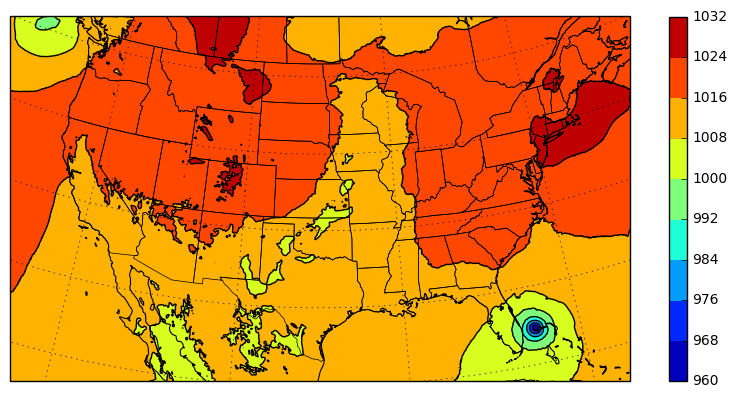

In [24]:
# SLP
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords

slp = getvar(ncfile, "slp")
smooth_slp = smooth2d(slp, 3)
lats, lons = latlon_coords(slp)

cart_proj = get_cartopy(slp)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=cart_proj)

states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=.5)
ax.coastlines('50m', linewidth=0.8)

# Can only get this to work if I manually transform the lat/lon points to projected space.
xform_coords = cart_proj.transform_points(crs.PlateCarree(), to_np(lons), to_np(lats))
x = xform_coords[:,:,0]
y = xform_coords[:,:,1]

plt.contour(x, y, to_np(smooth_slp), 10, colors="black")
plt.contourf(x, y, to_np(smooth_slp), 10)
plt.colorbar(ax=ax, shrink=.47)

ax.set_xlim(cartopy_xlim(slp))
ax.set_ylim(cartopy_ylim(slp))
ax.gridlines()


In [9]:
# SLP
from __future__ import (absolute_import, division, print_function, unicode_literals)
    
from netCDF4 import Dataset   
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords, geo_bounds

ncfile = Dataset("/Users/ladwig/Documents/wrf_files/wrfout_d01_2016-10-07_00_00_00")

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisey near the mountains
smooth_slp = smooth2d(slp, 3)

# Get the numpy array from the XLAT and XLONG coordinates
lats, lons = latlon_coords(slp, as_np=True)

# The cartopy() method returns a cartopy.crs projection object
cart_proj = get_cartopy(slp)

print (cart_proj)

print (get_cartopy(wrfin=ncfile))

bounds = geo_bounds(slp)

print (bounds)

subset = slp[150:250, 150:250]

subset_bounds = geo_bounds(subset)

print (subset_bounds)

file_bounds = geo_bounds(wrfin=ncfile)

print (file_bounds)

# Create a figure that's 10x10
fig = plt.figure(figsize=(10,10))
# Get the GeoAxes set to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=.5)
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level pressure.
# The transform keyword indicates that the lats and lons arrays are lat/lon coordinates and tells 
# cartopy to transform the points in to grid space.
plt.contour(lons, lats, to_np(smooth_slp), 10, colors="black", transform=crs.PlateCarree())
plt.contourf(lons, lats, to_np(smooth_slp), 10, transform=crs.PlateCarree())

# Add a color bar
plt.colorbar(ax=ax, shrink=.47)

# Set the map limits
ax.set_xlim(cartopy_xlim(slp))
ax.set_ylim(cartopy_ylim(slp))

# Add the gridlines
ax.gridlines()

GeoBounds(CoordPair(lat=21.1381225586, lon=-122.719528198), CoordPair(lat=47.8436355591, lon=-60.9013671875))
GeoBounds(CoordPair(lat=25.9246292114, lon=-119.675048828), CoordPair(lat=29.0761833191, lon=-117.46484375))
GeoBounds(CoordPair(lat=21.1381225586, lon=-122.719528198), CoordPair(lat=47.8436355591, lon=-60.9013671875))


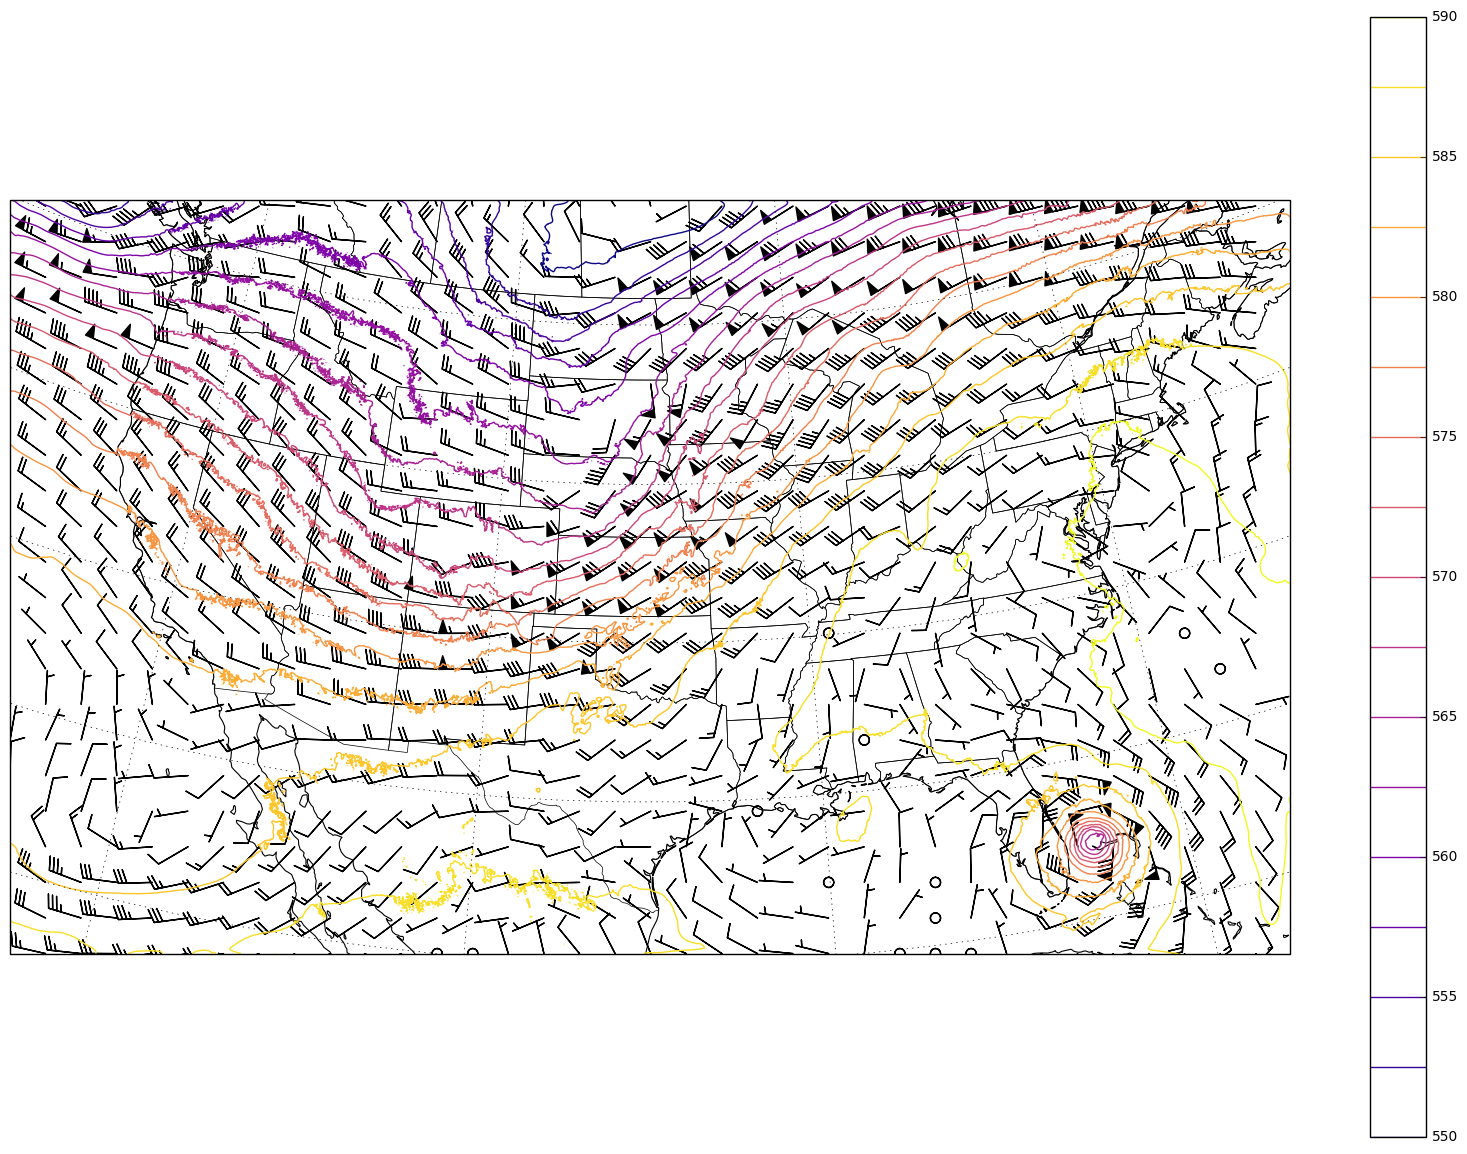

In [26]:
# 500 MB Heights and Winds

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import getvar, interplevel, to_np, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords


p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kts")
va = getvar(ncfile, "va", units="kts")

ht_500 = interplevel(z, p, 500)
u_500 = interplevel(ua, p, 500)
v_500 = interplevel(va, p, 500)

lats, lons = latlon_coords(ht_500)

cart_proj = get_cartopy(slp)

fig = plt.figure(figsize=(20,20))
ax = plt.axes([0.1,0.1,0.8,0.8], projection=cart_proj)

states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)

# Can only get this to work if I manually transform the lat/lon points to projected space.
xform_coords = cart_proj.transform_points(crs.PlateCarree(), to_np(lons), to_np(lats))
x = xform_coords[:,:,0]
y = xform_coords[:,:,1]

plt.contour(x, y, to_np(ht_500), 20, cmap=get_cmap("plasma"))
plt.barbs(x[::50,::50], y[::50,::50], to_np(u_500[::50, ::50]), to_np(v_500[::50, ::50]))
plt.colorbar(ax=ax, shrink=.7)

ax.set_xlim(cartopy_xlim(slp))
ax.set_ylim(cartopy_ylim(slp))
ax.gridlines()



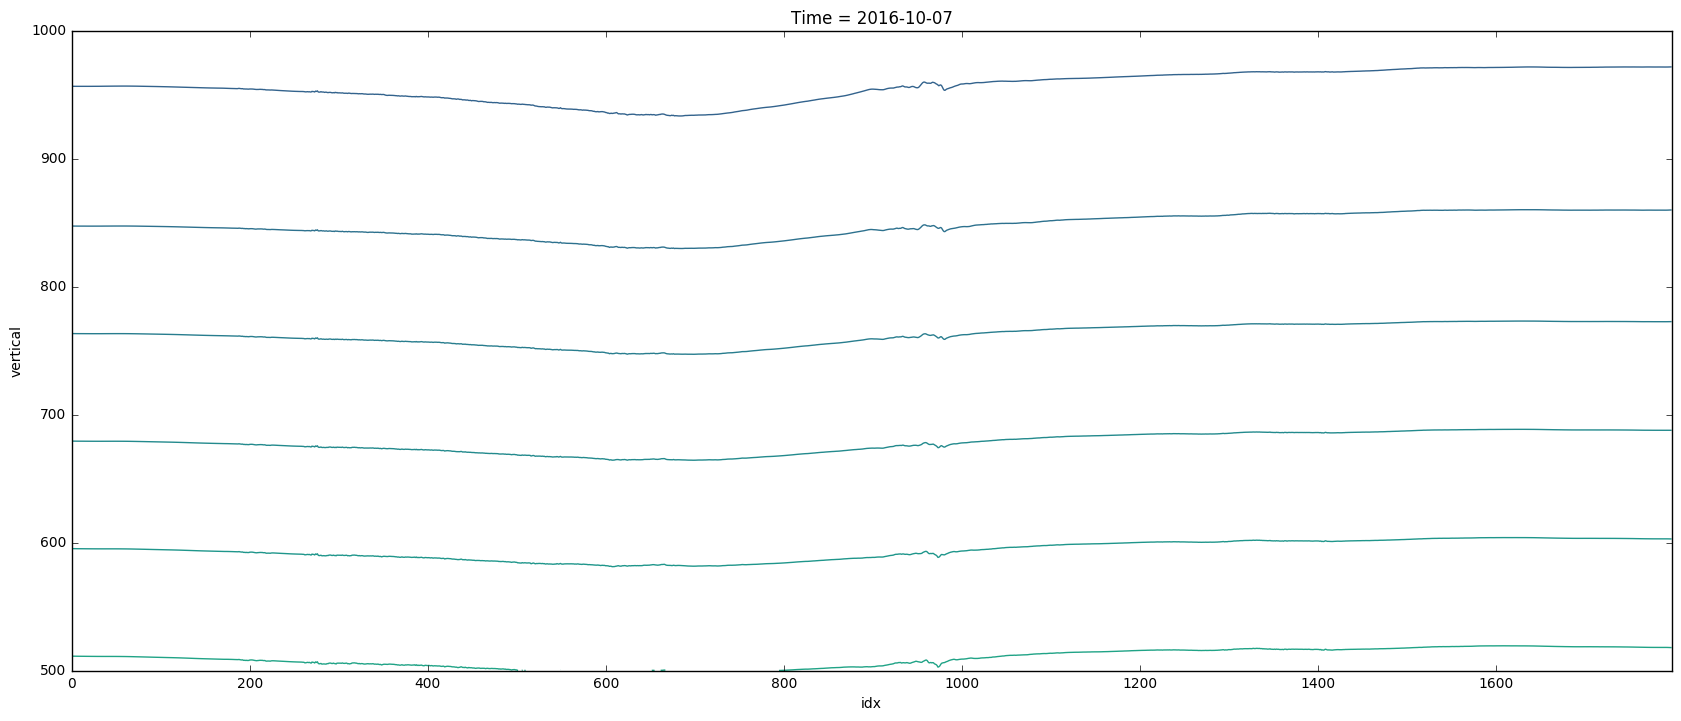

In [27]:
# Cross-section of pressure using xarray's builtin plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from wrf import getvar, vertcross, to_np, CoordPair

p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")

pivot_point = CoordPair(z.shape[-1] / 2, z.shape[-2] / 2) 
angle = 90.0

p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle, levels=[1000,850,500])

fig = plt.figure(figsize=(20,8))
ax = plt.axes([0.1,0.1,0.8,0.8])

p_vert.plot.contour(ax=ax, levels=[0 + 50*n for n in range(20)], cmap=get_cmap("viridis"))




# Multi-time Moving Domain Files

In [28]:
import os
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset as nc

dir = "/Users/ladwig/Documents/wrf_files/wrf_vortex_multi"
ncfilenames = [os.path.join(dir, x) for x in os.listdir(dir) if x.find("_d02_") > 0]
ncfiles = [nc(x) for x in ncfilenames]


#print (ncfiles[0].variables["XLONG"][0,0,-1], ncfiles[0].variables["XLONG"][-1,0,-1])
#print (ncfiles[1].variables["XLONG"][0,0,-1], ncfiles[1].variables["XLONG"][-1,0,-1])
#print (ncfiles[-1].variables["XLONG"][0,0,-1], ncfiles[-1].variables["XLONG"][-1,0,-1])


In [29]:
p = getvar(ncfiles, "ctt", timeidx=ALL_TIMES)

In [30]:
print (p)
#print (p.attrs["projection"].shape)


<xarray.DataArray u'ctt' (Time: 9, south_north: 96, west_east: 96)>
array([[[ 30.28734779,  30.25170326,  30.2116642 , ...,  30.43941689,
          30.35033607,  30.26937294],
        [ 30.32671547,  30.29772377,  30.2628727 , ...,  30.53902626,
          30.44616127,  30.35714149],
        [ 30.35683632,  30.3349247 ,  30.30584145, ...,  30.63564491,
          30.53905678,  30.44393349],
        ..., 
        [ 31.25283241,  31.12960243,  31.00759315, ...,  27.79311562,
          27.66298866,  27.57006264],
        [ 31.27178383,  31.15249062,  31.03255653, ...,  27.8573246 ,
          27.73256874,  27.64241982],
        [ 31.2713871 ,  31.17223549,  31.05983925, ...,  27.91900063,
          27.80031776,  27.70995522]],

       [[ 16.19169617,  15.99893379,  15.81915665, ...,   7.0032773 ,
           6.8763237 ,   6.93836355],
        [ 15.97773075,  15.74483204,  15.5394392 , ...,   6.78348255,
           6.72141266,   6.79115295],
        [ 15.84720802,  15.57518196,  15.20796871, .

In [31]:
print (p.attrs["projection"])


Mercator(stand_lon=-89.0, moad_cen_lat=27.9999923706, truelat1=0.0, truelat2=0.0, pole_lat=90.0, pole_lon=0.0)


In [32]:
ncfiles[2].variables["XTIME"][:]


array([ 1440.], dtype=float32)

In [33]:
p = getvar(ncfiles, "P", timeidx=None, method="cat", meta=True, squeeze=True)


In [34]:
print (p)

<xarray.DataArray u'P' (Time: 9, bottom_top: 29, south_north: 96, west_east: 96)>
array([[[[  3.21992188e+02,   3.22617188e+02,   3.26929688e+02, ...,
            7.19312500e+02,   7.25351562e+02,   7.33554688e+02],
         [  3.22265625e+02,   3.23390625e+02,   3.25281250e+02, ...,
            7.28359375e+02,   7.34804688e+02,   7.40921875e+02],
         [  3.18671875e+02,   3.22453125e+02,   3.24421875e+02, ...,
            7.35289062e+02,   7.42140625e+02,   7.48593750e+02],
         ..., 
         [  6.28960938e+02,   6.36382812e+02,   6.46265625e+02, ...,
            9.81765625e+02,   9.82148438e+02,   9.79617188e+02],
         [  6.30093750e+02,   6.34882812e+02,   6.39953125e+02, ...,
            9.78617188e+02,   9.78992188e+02,   9.79015625e+02],
         [  6.29757812e+02,   6.38273438e+02,   6.42812500e+02, ...,
            9.76695312e+02,   9.76875000e+02,   9.76453125e+02]],

        [[  3.08257812e+02,   3.09226562e+02,   3.11296875e+02, ...,
            7.04007812e+02, 

In [35]:
print (type(p.coords["Time"]))

<class 'xarray.core.dataarray.DataArray'>


In [36]:
import datetime
import pandas
print (type(p.coords["Time"].values.astype(datetime.datetime)))
print (repr(datetime.datetime.utcfromtimestamp(p.coords["Time"][0].values.astype(int) * 1E-9)))
print (pandas.to_datetime(p.coords["Time"].values))

<type 'numpy.ndarray'>
datetime.datetime(2005, 8, 28, 0, 0)
DatetimeIndex(['2005-08-28 00:00:00', '2005-08-28 03:00:00',
               '2005-08-28 06:00:00', '2005-08-28 09:00:00',
               '2005-08-28 12:00:00', '2005-08-28 15:00:00',
               '2005-08-28 18:00:00', '2005-08-28 21:00:00',
               '2005-08-29 00:00:00'],
              dtype='datetime64[ns]', freq=None)


In [37]:
wrf_vars = ["avo", "eth", "cape_2d", "cape_3d", "ctt", "dbz", "mdbz", 
            "geopt", "helicity", "lat", "lon", "omg", "p", "pressure", 
            "pvo", "pw", "rh2", "rh", "slp", "ter", "td2", "td", "tc",
            "theta", "tk", "tv", "twb", "updraft_helicity", "ua", "va", 
            "wa", "uvmet10", "uvmet", "z", "ctt"]
#wrf_vars = ["cape_2d"]

vard = {}
for varname in wrf_vars:
    print (varname)
    vard[varname] = getvar(ncfiles, varname, timeidx=None, method="cat", squeeze=False)
    
#vard = {varname: getvar(ncfiles, varname, method="join", squeeze=False) for varname in wrf_vars}
for varname in wrf_vars:
    print(vard[varname])
    

avo
eth
cape_2d
cape_3d
ctt
dbz
mdbz
geopt
helicity
lat
lon
omg
p
pressure
pvo
pw
rh2
rh
slp
ter
td2
td
tc
theta
tk
tv
twb
updraft_helicity
ua
va
wa
uvmet10
uvmet
z
ctt
<xarray.DataArray u'avo' (Time: 9, bottom_top: 29, south_north: 96, west_east: 96)>
array([[[[  7.73769617e+00,   7.48541594e+00,   7.22978735e+00, ...,
            4.78373480e+00,   4.87631512e+00,   4.95874310e+00],
         [  7.57064867e+00,   7.31604338e+00,   7.04749489e+00, ...,
            4.93641710e+00,   4.94655180e+00,   4.98926544e+00],
         [  7.41925430e+00,   7.15939283e+00,   6.89230490e+00, ...,
            5.14343643e+00,   5.06675816e+00,   5.06729269e+00],
         ..., 
         [  4.26994848e+00,   4.27401161e+00,   4.25820255e+00, ...,
            6.82580757e+00,   7.37988615e+00,   7.63858509e+00],
         [  3.96810937e+00,   3.90270591e+00,   3.83178568e+00, ...,
            6.91770077e+00,   7.46632814e+00,   7.73172283e+00],
         [  3.85029602e+00,   3.74332190e+00,   3.64234424e+00

In [38]:
import os
from wrf import getvar
from netCDF4 import Dataset as nc

dir = "/Users/ladwig/Documents/wrf_files/wrf_vortex_multi"
ncfilenames = [os.path.join(dir, x) for x in os.listdir(dir) if x.find("_d02_") > 0]
ncfiles = [nc(x) for x in ncfilenames]

# Pressure using pivot and angle
from wrf import getvar, vertcross, CoordPair

timeidx = 0
z = getvar(ncfiles, "z", timeidx, method="join")
p = getvar(ncfiles, "pressure", timeidx, method="join")
pivot_point = CoordPair(z.shape[-1] / 2, z.shape[-2] / 2) 
angle = 40.0

p_vert = vertcross(p, z, pivot_point=pivot_point, angle=angle)
print(p_vert)
print ("\n")
del p_vert

# Pressure using start_point and end_point
start_point = CoordPair(0, z.shape[-2]/2)
end_point = CoordPair(-1, z.shape[-2]/2)

p_vert = vertcross(p, z, start_point=start_point, end_point=end_point)
print(p_vert)
del p_vert, p, z

<xarray.DataArray u'pressure_cross' (file: 3, vertical: 100, idx: 127)>
array([[[          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [ 980.74664307,  980.77416992,  980.79528809, ...,  986.93023682,
          986.90289307,  986.87811279],
        [ 958.53637695,  958.55133057,  958.58758545, ...,  964.4765625 ,
          964.44683838,  964.4230957 ],
        ..., 
        [  57.70079041,   57.70930099,   57.72071075, ...,   58.59809113,
           58.5868988 ,   58.57575989],
        [  55.69421768,   55.70588684,   55.71718979, ...,   56.61871719,
           56.60722733,   56.59528351],
        [          nan,           nan,           nan, ...,   54.63936234,
           54.62757492,   54.61482239]],

       [[          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [ 977.41168213,  977.38916016,  977.32672119, ...,  983.38336182,
          983.55688477,  983.76306152],


In [39]:
import os
from wrf import getvar
from netCDF4 import Dataset as nc

dir = "/Users/ladwig/Documents/wrf_files/wrf_vortex_multi"
ncfilenames = [os.path.join(dir, x) for x in os.listdir(dir) if x.find("_d02_") > 0]
ncfiles = [nc(x) for x in ncfilenames]

timeidx = None

# T2 using pivot and angle
from wrf import interpline, getvar, to_np, CoordPair

t2 = getvar(ncfiles, "T2", timeidx)
pivot_point = CoordPair(t2.shape[-2] / 2, t2.shape[-1] / 2) 
angle = 90.0

t2_line = interpline(t2, pivot_point=pivot_point, angle=angle, latlon=True)
print(t2_line)
print("\n")


del t2_line

# T2 using start_point and end_point
start_point = CoordPair(t2.shape[-2]/2, 0)
end_point = CoordPair(t2.shape[-2]/2, -1)

t2_line = interpline(t2, start_point=start_point, end_point=end_point, latlon=True)
print(t2_line)
print("\n")

del t2_line, t2

<xarray.DataArray u'T2_line' (Time: 9, line_idx: 95)>
array([[ 304.17645264,  304.17849731,  304.18066406,  304.18206787,
         304.18035889,  304.17495728,  304.16564941,  304.15133667,
         304.13232422,  304.10839844,  304.08227539,  304.05413818,
         304.02490234,  303.99533081,  303.96630859,  303.9385376 ,
         303.91409302,  303.89355469,  303.87640381,  303.86752319,
         303.86819458,  303.87002563,  303.87493896,  303.87683105,
         303.87747192,  303.87612915,  303.86325073,  303.8414917 ,
         303.80178833,  303.74475098,  303.67010498,  303.57873535,
         303.47271729,  303.35333252,  303.23074341,  303.10748291,
         302.98583984,  302.87646484,  302.78048706,  302.70040894,
         302.63555908,  302.58633423,  302.55371094,  302.52914429,
         302.51303101,  302.50372314,  302.50143433,  302.50482178,
         302.51464844,  302.52679443,  302.54229736,  302.55899048,
         302.58789062,  302.62628174,  302.67501831,  302.7282

In [40]:
from wrf import getvar


In [42]:
from wrf.latlon import xy_to_ll, ll_to_xy 

a = xy_to_ll(ncfiles, 400, 200)
a = xy_to_ll(ncfiles, [400,105], [200,205])
b = ll_to_xy(ncfiles, 45.5, -110.8, as_int=True)

# Note: Lists/Dictionaries of files will add a new dimension ('domain') only if the domain is moving
c = xy_to_ll(ncfiles, [400,105], [200,205])
d = xy_to_ll({"label1" : ncfiles,
              "label2" : ncfiles}, 
             [400,105], [200,205])

print(a)
print("\n")
print(b)
print("\n")
print(c)
print("\n")
print(d)


<xarray.DataArray u'latlon' (lat_lon: 2, idx: 2)>
array([[ 36.93808939,  37.29670428],
       [-54.59554706, -81.12969927]])
Coordinates:
  * lat_lon   (lat_lon) <U3 u'lat' u'lon'
    xy_coord  (idx) object CoordPair(x=400, y=200) CoordPair(x=105, y=205)
  * idx       (idx) int64 0 1


<xarray.DataArray u'xy' (x_y: 2)>
array([-225,  327])
Coordinates:
    latlon_coord  object CoordPair(lat=45.5, lon=-110.8)
  * x_y           (x_y) <U1 u'x' u'y'
    idx           int64 0


<xarray.DataArray u'latlon' (lat_lon: 2, idx: 2)>
array([[ 36.93808939,  37.29670428],
       [-54.59554706, -81.12969927]])
Coordinates:
  * lat_lon   (lat_lon) <U3 u'lat' u'lon'
    xy_coord  (idx) object CoordPair(x=400, y=200) CoordPair(x=105, y=205)
  * idx       (idx) int64 0 1


<xarray.DataArray u'latlon' (lat_lon: 2, domain_idx: 2, idx: 2)>
array([[[ 36.93808939,  36.93808939],
        [ 37.29670428,  37.29670428]],

       [[-54.59554706, -54.59554706],
        [-81.12969927, -81.12969927]]])
Coordinates:
  

In [32]:
from glob import glob
from wrf import getvar, ALL_TIMES, geo_bounds, get_cartopy, get_basemap, get_pyngl, cartopy_xlim, cartopy_ylim
from netCDF4 import Dataset as nc

wrf_filenames = glob("/Users/ladwig/Documents/wrf_files/wrf_vortex_multi/wrfout_d02_*")
ncfiles = [nc(x) for x in wrf_filenames]

slp = getvar(ncfiles, "slp", timeidx=ALL_TIMES)

bounds = geo_bounds(slp)
print (bounds)
print ()

cart_proj = get_cartopy(slp)
print (cart_proj)
print ("\n")

xlims = cartopy_xlim(slp)
print (xlims)
print ("\n")

ylims = cartopy_ylim(slp)
print (ylims)
print ("\n")


bm = get_basemap(slp)
print (bm)
print ("\n")

pyngl_res = get_pyngl(slp)
print (pyngl_res)
print ("\n")


[ GeoBounds(CoordPair(lat=21.3020038605, lon=-90.5740585327), CoordPair(lat=29.0274410248, lon=-82.0291671753))
 GeoBounds(CoordPair(lat=21.3020038605, lon=-90.3042221069), CoordPair(lat=29.0274410248, lon=-81.7593231201))
 GeoBounds(CoordPair(lat=21.3020038605, lon=-90.8438949585), CoordPair(lat=29.0274410248, lon=-82.2990036011))
 GeoBounds(CoordPair(lat=21.3020038605, lon=-91.1137390137), CoordPair(lat=29.0274410248, lon=-82.5688400269))
 GeoBounds(CoordPair(lat=21.8039493561, lon=-91.6534042358), CoordPair(lat=29.4982528687, lon=-83.1085205078))
 GeoBounds(CoordPair(lat=22.0542640686, lon=-92.193107605), CoordPair(lat=29.7328338623, lon=-83.6481933594))
 GeoBounds(CoordPair(lat=22.5535621643, lon=-92.7327728271), CoordPair(lat=30.2003688812, lon=-84.1878738403))
 GeoBounds(CoordPair(lat=22.8025398254, lon=-93.0026092529), CoordPair(lat=30.4333114624, lon=-84.4577102661))
 GeoBounds(CoordPair(lat=23.0510597229, lon=-93.2724456787), CoordPair(lat=30.665681839, lon=-84.7275543213))]

